# \#Analysis
## What did these accounts tweet about?  Who did they tweet with?

In [1]:
import os
import datetime
import regex as re
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
plt.style.use('fivethirtyeight')
#%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams.update({'font.size': 16})

In [3]:
from nltk.corpus import stopwords

In [4]:
eng_tweets = pd.read_pickle('../data/eng_tweets.p')

In [5]:
eng_tweets.account_category.value_counts()

RightTroll      646007
NewsFeed        541260
LeftTroll       385410
HashtagGamer    204239
Commercial      112580
Fearmonger       10524
Unknown           6496
Name: account_category, dtype: int64

In [6]:
targets = ['RightTroll', 'LeftTroll']
subset = eng_tweets.loc[eng_tweets.account_category.isin(targets)]
subset.head()

,external_author_id,author,content,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,hashtags,mentions
0,906000000000000000,10_GOP,We have a sitting Democrat US Senator on trial...,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,NaN,Right,0,RightTroll,0,905874659358453760,914580356430536707,[],[@nedryun]
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti Trump s...,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,NaN,Right,0,RightTroll,0,905874659358453760,914621840496189440,[],[]
2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,RETWEET,Right,1,RightTroll,0,905874659358453760,914623490375979008,[#BoycottNFL],[]
3,906000000000000000,10_GOP,JUST IN President Trump dedicates Presidents C...,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,NaN,Right,0,RightTroll,0,905874659358453760,914639143690555392,[],[]
4,906000000000000000,10_GOP,19000 RESPECTING our National Anthem Stand For...,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,RETWEET,Right,1,RightTroll,0,905874659358453760,914312219952861184,[#StandForOurAnthem],[]


In [7]:
hashtag_df = pd.DataFrame(subset.hashtags[eng_tweets.hashtags.apply(
    lambda hashtags_list: hashtags_list !=[])])

flattened_hashtags = hashtag_df.hashtags.tolist()
flattened_hashtags = [item for sublist in flattened_hashtags for item in sublist]

hashtag_frequency = Counter(pd.Series(flattened_hashtags))

In [8]:
mentions_df = pd.DataFrame(subset.mentions[
    eng_tweets.mentions.apply(lambda mention_list: mention_list !=[])])

flattened_mentions = mentions_df.mentions.tolist()
flattened_mentions = [item for sublist in flattened_mentions for item in sublist]
flattened_mentions = [item for item in flattened_mentions if item != '@']

mention_frequency = Counter(pd.Series(flattened_mentions))

In [9]:
right_hashtag_df = pd.DataFrame(subset.hashtags[(eng_tweets.hashtags.apply(
    lambda hashtags_list: hashtags_list !=[])) & 
    (eng_tweets.account_category=='RightTroll')])

right_flattened_hashtags = right_hashtag_df.hashtags.tolist()
right_flattened_hashtags = [item for sublist in right_flattened_hashtags for item in sublist]

right_hashtag_freq = Counter(pd.Series(right_flattened_hashtags))

In [10]:
left_hashtag_df = pd.DataFrame(subset.hashtags[(eng_tweets.hashtags.apply(
    lambda hashtags_list: hashtags_list !=[])) & 
    (eng_tweets.account_category=='LeftTroll')])

left_flattened_hashtags = left_hashtag_df.hashtags.tolist()
left_flattened_hashtags = [item for sublist in left_flattened_hashtags for item in sublist]

left_hashtag_freq = Counter(pd.Series(left_flattened_hashtags))

In [11]:
right_mentions_df = pd.DataFrame(subset.mentions[
    (eng_tweets.mentions.apply(lambda mention_list: mention_list !=[])) & 
    (eng_tweets.account_category=='RightTroll')])

right_flattened_mentions = right_mentions_df.mentions.tolist()
right_flattened_mentions = [item for sublist in right_flattened_mentions for item in sublist]
right_flattened_mentions = [item for item in right_flattened_mentions if item != '@']

right_mention_freq = Counter(pd.Series(right_flattened_mentions))

In [12]:
left_mentions_df = pd.DataFrame(subset.mentions[
    (eng_tweets.mentions.apply(lambda mention_list: mention_list !=[])) &
    (eng_tweets.account_category=='LeftTroll')])

left_flattened_mentions = mentions_df.mentions.tolist()
left_flattened_mentions = [item for sublist in flattened_mentions for item in sublist]
left_flattened_mentions = [item for item in flattened_mentions if item != '@']

left_mention_freq = Counter(pd.Series(left_flattened_mentions))

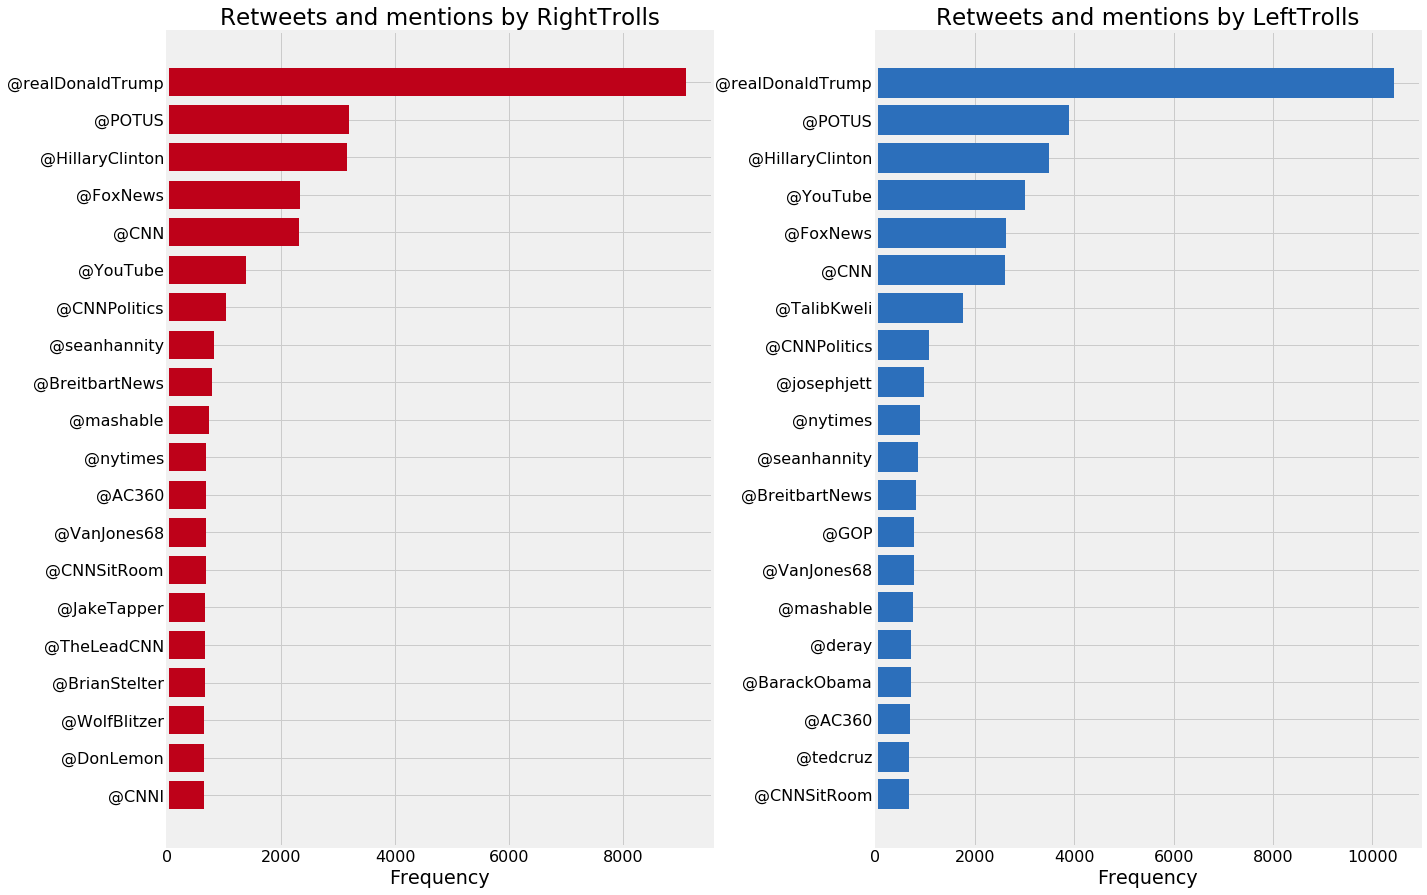

In [36]:
fig = plt.figure(figsize=(20,15))
bar_width = 0.75
bar_space = 0.5

plt.subplot(1,2,1)
top20right = right_mention_freq.most_common(20)
keys = [x[0] for x in top20right]
vals = [x[1] for x in top20right]
xpos = range(len(vals),0,-1)
plt.barh(xpos, vals, bar_width, color='#be0119')
plt.yticks(xpos,keys)
plt.title('Retweets and mentions by RightTrolls')
plt.xlabel('Frequency')

plt.subplot(1,2,2)
top20left = left_mention_freq.most_common(20)
keys = [x[0] for x in top20left]
vals = [x[1] for x in top20left]

xpos = range(len(vals),0,-1)
plt.barh(xpos, vals, color='#2c6fbb')
plt.yticks(xpos,keys)
plt.title('Retweets and mentions by LeftTrolls')
plt.xlabel('Frequency')

plt.subplots_adjust(wspace=0.3)
plt.show()

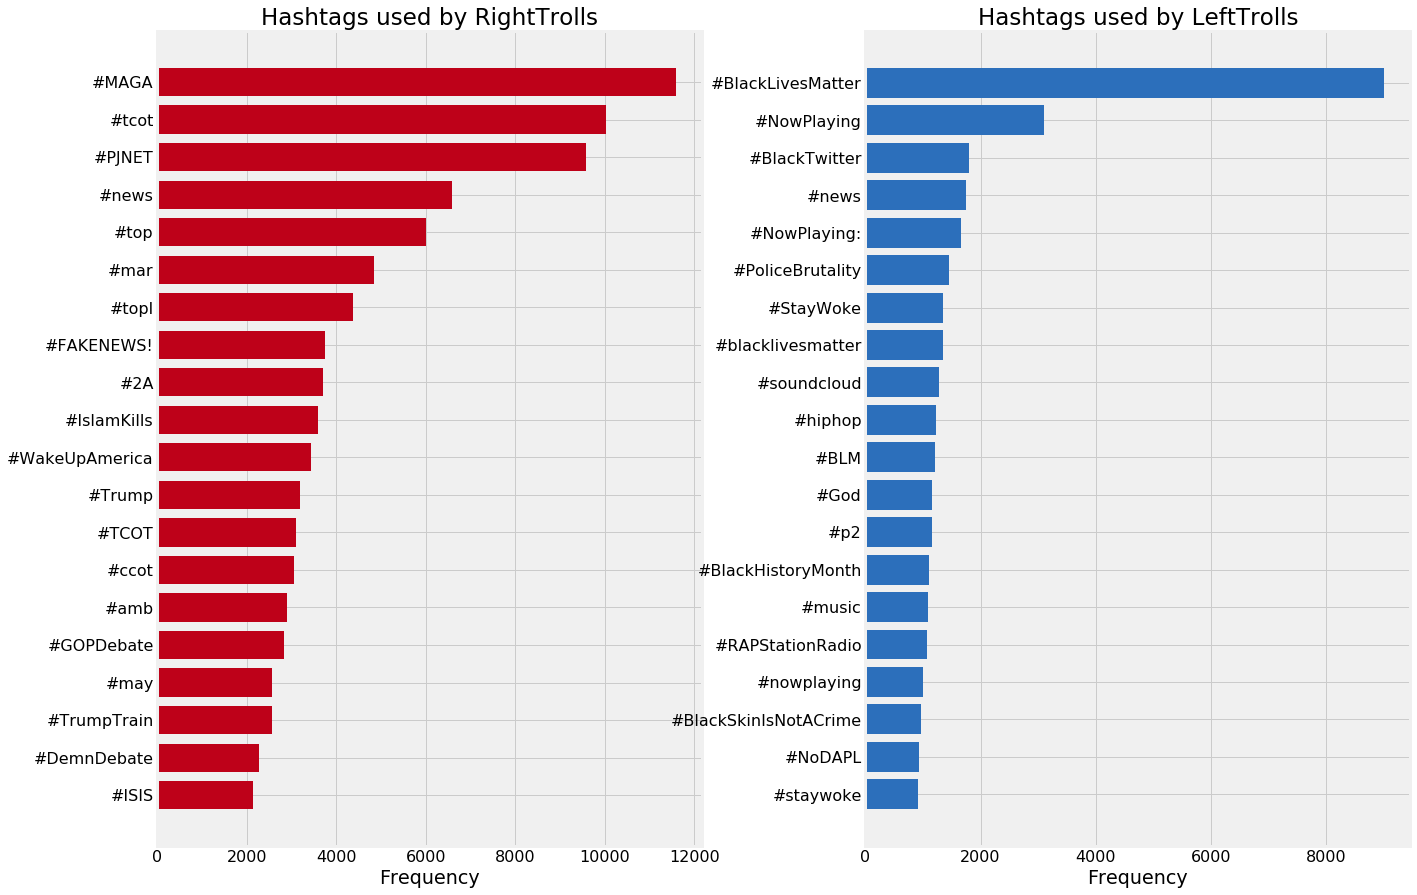

In [37]:
fig = plt.figure(figsize=(20,15))
bar_width = 0.75
bar_space = 0.5

plt.subplot(1,2,1)
top20right = right_hashtag_freq.most_common(20)
keys = [x[0] for x in top20right]
vals = [x[1] for x in top20right]
xpos = range(len(vals),0,-1)
plt.barh(xpos, vals, bar_width, color='#be0119')
plt.yticks(xpos,keys)
plt.title('Hashtags used by RightTrolls')
plt.xlabel('Frequency')

plt.subplot(1,2,2)
top20left = left_hashtag_freq.most_common(20)
keys = [x[0] for x in top20left]
vals = [x[1] for x in top20left]

xpos = range(len(vals),0,-1)
plt.barh(xpos, vals, color='#2c6fbb')
plt.yticks(xpos,keys)
plt.title('Hashtags used by LeftTrolls')
plt.xlabel('Frequency')

plt.subplots_adjust(wspace=0.3)
plt.show()